In [87]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
#importing warnings and filtering out warnings to ignore it
warnings.filterwarnings("ignore")

In [88]:
#reading csv data using pandas
df = pd.read_csv('LandslideDataset.csv')

In [89]:
#reading top 5 records
df.head()

,date,lat,lon,country,fatalities,injuries,type,trigger,location,precip,temp,air,humidity,wind,slope,label,severity
0,09-06-2015,25.9703,91.8584,India,0.0,0.0,landslide,unknown,above_road,7.7,96,1006,99,4,55,1,medium
1,5/25/2011,17.2961,121.1877,Philippines,0.0,0.0,landslide,downpour,unknown,1.2,103,1013,93,8,114,1,medium
2,10/16/2013,30.5345,79.0853,India,0.0,0.0,landslide,unknown,unknown,0.0,53,1017,82,18,116,1,medium
3,03-09-2016,-6.6811,107.0274,Indonesia,0.0,11.0,landslide,continuous_rain,natural_slope,4.3,93,1014,92,11,-1,1,medium
4,10-12-2011,9.6514,124.3655,Philippines,0.0,0.0,landslide,downpour,unknown,0.2,93,1011,82,11,46,1,medium


In [90]:
df = df.drop("date", axis=1)
df = df.drop("label", axis=1)

In [91]:
#reading top 5 records
df.head()

,lat,lon,country,fatalities,injuries,type,trigger,location,precip,temp,air,humidity,wind,slope,severity
0,25.9703,91.8584,India,0.0,0.0,landslide,unknown,above_road,7.7,96,1006,99,4,55,medium
1,17.2961,121.1877,Philippines,0.0,0.0,landslide,downpour,unknown,1.2,103,1013,93,8,114,medium
2,30.5345,79.0853,India,0.0,0.0,landslide,unknown,unknown,0.0,53,1017,82,18,116,medium
3,-6.6811,107.0274,Indonesia,0.0,11.0,landslide,continuous_rain,natural_slope,4.3,93,1014,92,11,-1,medium
4,9.6514,124.3655,Philippines,0.0,0.0,landslide,downpour,unknown,0.2,93,1011,82,11,46,medium


In [92]:
#info helps get quick insite on data fields - null counts, data type and column count with that dtype, total records, total columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76108 entries, 0 to 76107
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   lat         71632 non-null  float64
 1   lon         71632 non-null  float64
 2   country     71632 non-null  object 
 3   fatalities  71632 non-null  float64
 4   injuries    71632 non-null  float64
 5   type        71632 non-null  object 
 6   trigger     71632 non-null  object 
 7   location    71632 non-null  object 
 8   precip      76108 non-null  float64
 9   temp        76108 non-null  int64  
 10  air         76108 non-null  int64  
 11  humidity    76108 non-null  int64  
 12  wind        76108 non-null  int64  
 13  slope       76108 non-null  int64  
 14  severity    76108 non-null  object 
dtypes: float64(5), int64(5), object(5)
memory usage: 8.7+ MB


In [93]:
#gives null count for records in each column
df.isnull().sum()

lat           4476
lon           4476
country       4476
fatalities    4476
injuries      4476
type          4476
trigger       4476
location      4476
precip           0
temp             0
air              0
humidity         0
wind             0
slope            0
severity         0
dtype: int64

In [94]:
df["lon"].value_counts(dropna=False)

lon
NaN           4476
83.293400       48
75.191500       48
77.594700       48
101.767300      48
              ... 
100.350800      16
120.986700      16
109.029300      16
121.733428      16
92.906400       16
Name: count, Length: 4392, dtype: int64

In [95]:
#removing row having NaN data
df = df[df['lat'].notna()]

In [96]:
#gives null count for records in each column
df.isnull().sum()

lat           0
lon           0
country       0
fatalities    0
injuries      0
type          0
trigger       0
location      0
precip        0
temp          0
air           0
humidity      0
wind          0
slope         0
severity      0
dtype: int64

In [97]:
df["trigger"].value_counts(dropna=False)

trigger
downpour                   33248
rain                       14048
continuous_rain             7488
tropical_cyclone            5600
unknown                     4688
monsoon                     1984
mining                      1168
earthquake                   864
construction                 864
snowfall_snowmelt            640
flooding                     384
other                        208
...                          208
no_apparent_trigger          112
dam_embankment_collapse       48
freeze_thaw                   32
volcano                       32
leaking_pipe                  16
Name: count, dtype: int64

In [98]:
#replacing NaN with np.nan
df["trigger"].replace("NaN",np.nan,inplace=True)
df["trigger"].replace("unknown",np.nan,inplace=True)

In [99]:
#replacing all np.nan with most frequently repeating element
from sklearn.impute import SimpleImputer
def simpImputer(df,column):
    # Create an imputer with a strategy

    imputer = SimpleImputer(strategy="most_frequent")
    # Fit and transform the imputer on Competitor type

    df[[column]] = imputer.fit_transform(df[[column]])

In [100]:
simpImputer(df,"trigger")

In [101]:
df["type"].value_counts(dropna=False)

type
landslide              60080
mudslide                5952
rock_fall               2496
complex                 1200
debris_flow              624
other                    384
riverbank_collapse       368
unknown                  176
translational_slide      112
snow_avalanche            96
lahar                     48
earth_flow                48
rotational_slide          32
...                       16
Name: count, dtype: int64

In [102]:
#replacing NaN with np.nan
df["type"].replace("NaN",np.nan,inplace=True)
df["type"].replace("unknown",np.nan,inplace=True)

In [103]:
simpImputer(df,"type")

In [104]:
df["location"].value_counts(dropna=False)

location
unknown             47424
above_road          12000
natural_slope        4384
urban                1920
mine                 1744
above_river          1120
below_road            736
...                   640
deforested_slope      544
retaining_wall        384
other                 320
engineered_slope      288
bluff                  64
burned_area            32
above_coast            16
                       16
Name: count, dtype: int64

In [105]:
#replacing NaN with np.nan
df["location"].replace("NaN",np.nan,inplace=True)
df["location"].replace("unknown",np.nan,inplace=True)

In [106]:
simpImputer(df,"location")

In [107]:
df["severity"].value_counts(dropna=False)

severity
medium     52800
small       9808
large       7744
unknown     1200
...           80
Name: count, dtype: int64

In [108]:
#replacing NaN with np.nan
df["severity"].replace("...",np.nan,inplace=True)
df["severity"].replace("unknown",np.nan,inplace=True)

In [109]:
simpImputer(df,"severity")

In [110]:
#gets measure of central tendancy along with q1, q2, q3
df.describe()

,lat,lon,fatalities,injuries,precip,temp,air,humidity,wind,slope
count,71632.000000,71632.000000,71632.000000,71632.000000,71632.000000,71632.000000,71632.000000,71632.000000,71632.000000,71632.000000
mean,20.349589,97.503543,5.348001,0.497431,3.101009,81.808410,980.601449,85.153549,11.505794,144.510163
std,12.206324,19.172967,91.449239,5.400573,5.093331,20.698099,170.150840,20.247553,6.741902,1048.185162
min,-25.368900,-123.264300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,10.387900,80.608464,0.000000,0.000000,0.200000,77.000000,1007.000000,84.000000,7.000000,43.000000
50%,25.092576,94.116035,0.000000,0.000000,1.500000,86.000000,1010.000000,92.000000,10.000000,71.000000
75%,29.357700,113.713100,2.000000,0.000000,4.100000,94.000000,1012.000000,97.000000,14.000000,100.000000
max,54.980900,150.447600,5000.000000,300.000000,158.300000,137.000000,1047.000000,100.000000,139.000000,17799.000000


In [111]:
#separating data into x and y i.e separating into features and target
features = df.iloc[:,:-1]
target = df.iloc[:,-1]

In [112]:
features

,lat,lon,country,fatalities,injuries,type,trigger,location,precip,temp,air,humidity,wind,slope
0,25.970300,91.858400,India,0.0,0.0,landslide,downpour,above_road,7.7,96,1006,99,4,55
1,17.296100,121.187700,Philippines,0.0,0.0,landslide,downpour,above_road,1.2,103,1013,93,8,114
2,30.534500,79.085300,India,0.0,0.0,landslide,downpour,above_road,0.0,53,1017,82,18,116
3,-6.681100,107.027400,Indonesia,0.0,11.0,landslide,continuous_rain,natural_slope,4.3,93,1014,92,11,-1
4,9.651400,124.365500,Philippines,0.0,0.0,landslide,downpour,above_road,0.2,93,1011,82,11,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76102,33.580800,74.903500,India,0.0,0.0,landslide,downpour,above_road,0.0,59,1023,73,10,70
76103,27.854100,98.683000,China,32.0,0.0,mudslide,downpour,above_road,0.4,66,1014,99,10,120
76104,12.856627,102.608286,Cambodia,2.0,0.0,rock_fall,construction,engineered_slope,2.0,102,1011,86,8,24
76105,3.152300,101.683200,Malaysia,0.0,0.0,landslide,rain,above_road,2.4,105,1010,98,8,34


In [113]:
target

0        medium
1        medium
2        medium
3        medium
4        medium
          ...  
76102    medium
76103     large
76104     small
76105    medium
76107    medium
Name: severity, Length: 71632, dtype: object

## Data Cleaning is not required as we don't have any numberical column as object

## Label Encoding

In [114]:
# separating numerical and categorical columns
num_cols = df.select_dtypes(["int", "float"])
cat_cols = df.select_dtypes(["object"])

In [115]:
from sklearn.preprocessing import LabelEncoder

In [116]:
le = LabelEncoder()

In [117]:
label_encoders = {}
for column in cat_cols:
    le = LabelEncoder()
    cat_cols[column] = le.fit_transform(cat_cols[column])
    label_encoders[column] = le

In [118]:
cat_cols

,country,type,trigger,location,severity
0,8,5,4,4,1
1,20,5,4,4,1
2,8,5,4,4,1
3,9,5,2,11,1
4,20,5,4,4,1
...,...,...,...,...,...
76102,8,5,4,4,1
76103,6,6,4,4,0
76104,5,9,1,9,2
76105,13,5,13,4,1


## Concatinating numerical cols and label encoded categorical cols

In [119]:
num_cols

,lat,lon,fatalities,injuries,precip,temp,air,humidity,wind,slope
0,25.970300,91.858400,0.0,0.0,7.7,96,1006,99,4,55
1,17.296100,121.187700,0.0,0.0,1.2,103,1013,93,8,114
2,30.534500,79.085300,0.0,0.0,0.0,53,1017,82,18,116
3,-6.681100,107.027400,0.0,11.0,4.3,93,1014,92,11,-1
4,9.651400,124.365500,0.0,0.0,0.2,93,1011,82,11,46
...,...,...,...,...,...,...,...,...,...,...
76102,33.580800,74.903500,0.0,0.0,0.0,59,1023,73,10,70
76103,27.854100,98.683000,32.0,0.0,0.4,66,1014,99,10,120
76104,12.856627,102.608286,2.0,0.0,2.0,102,1011,86,8,24
76105,3.152300,101.683200,0.0,0.0,2.4,105,1010,98,8,34


In [120]:
df1 = pd.concat([num_cols,cat_cols], axis=1)

In [121]:
df1

,lat,lon,fatalities,injuries,precip,temp,air,humidity,wind,slope,country,type,trigger,location,severity
0,25.970300,91.858400,0.0,0.0,7.7,96,1006,99,4,55,8,5,4,4,1
1,17.296100,121.187700,0.0,0.0,1.2,103,1013,93,8,114,20,5,4,4,1
2,30.534500,79.085300,0.0,0.0,0.0,53,1017,82,18,116,8,5,4,4,1
3,-6.681100,107.027400,0.0,11.0,4.3,93,1014,92,11,-1,9,5,2,11,1
4,9.651400,124.365500,0.0,0.0,0.2,93,1011,82,11,46,20,5,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76102,33.580800,74.903500,0.0,0.0,0.0,59,1023,73,10,70,8,5,4,4,1
76103,27.854100,98.683000,32.0,0.0,0.4,66,1014,99,10,120,6,6,4,4,0
76104,12.856627,102.608286,2.0,0.0,2.0,102,1011,86,8,24,5,9,1,9,2
76105,3.152300,101.683200,0.0,0.0,2.4,105,1010,98,8,34,13,5,13,4,1


In [122]:
from scipy.stats import skew

Column: lat
-0.7213706287814249


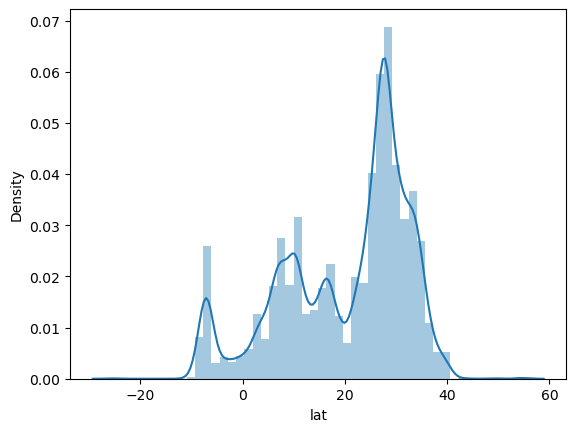

Column: lon
-0.2341250025118206


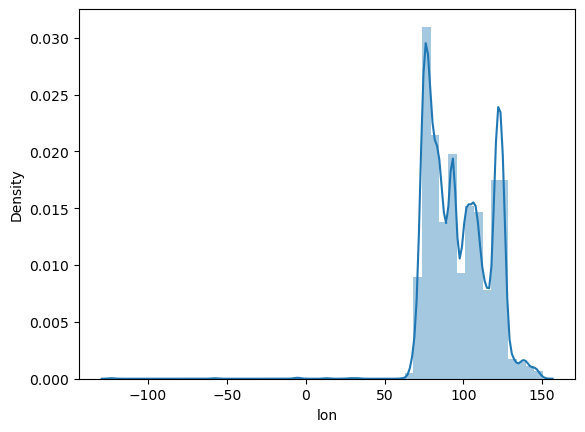

Column: fatalities
43.064352960158814


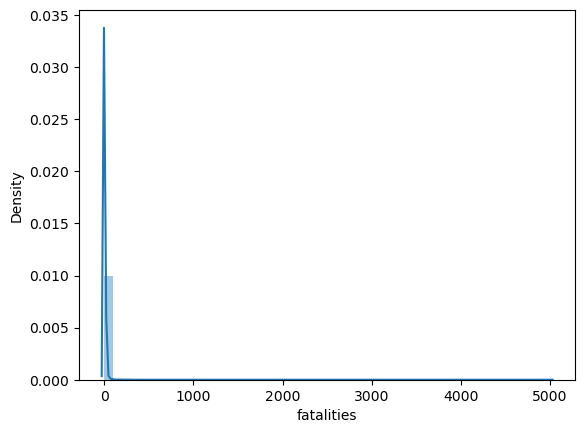

Column: injuries
41.657143522203725


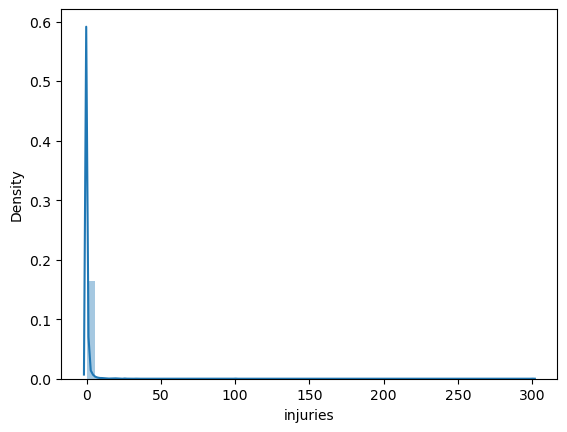

Column: precip
5.826477096336525


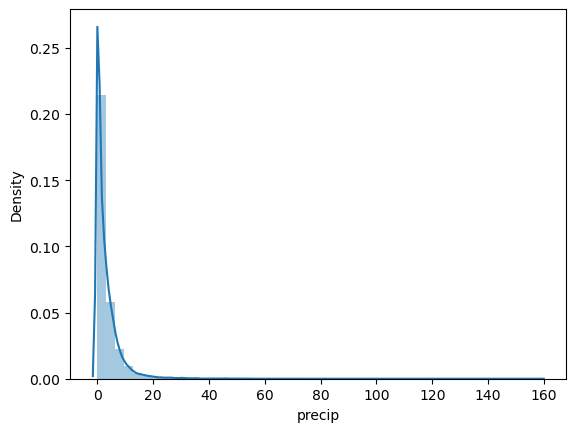

Column: temp
-2.03595939429904


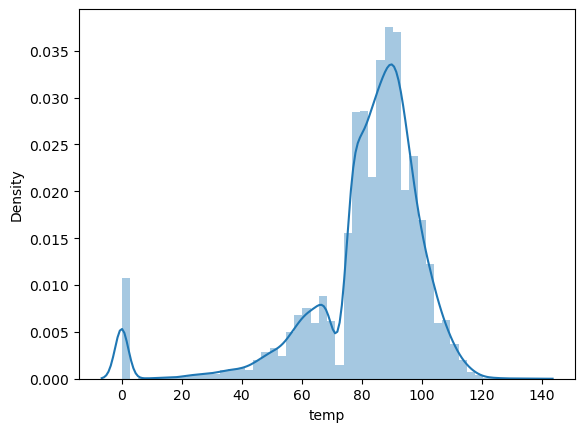

Column: air
-5.584850248469864


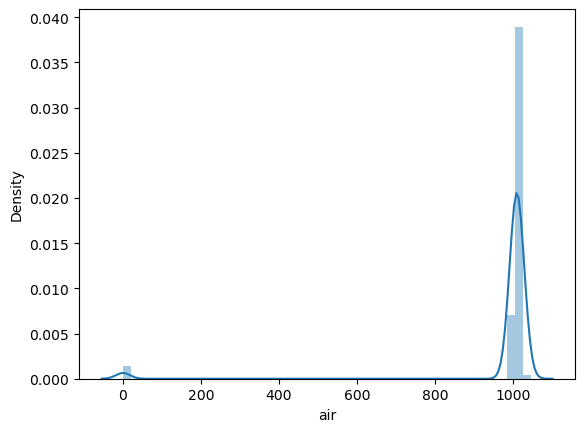

Column: humidity
-2.719368175389688


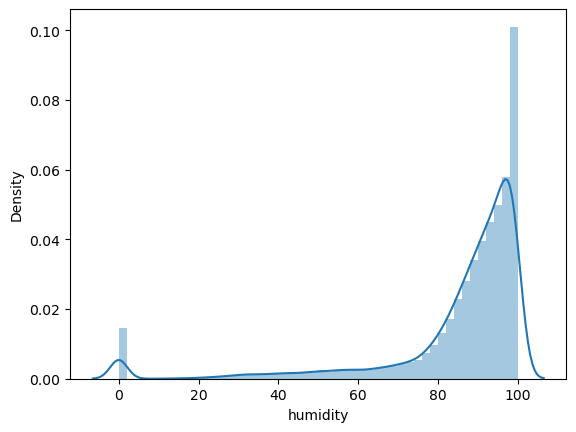

Column: wind
2.176501814430232


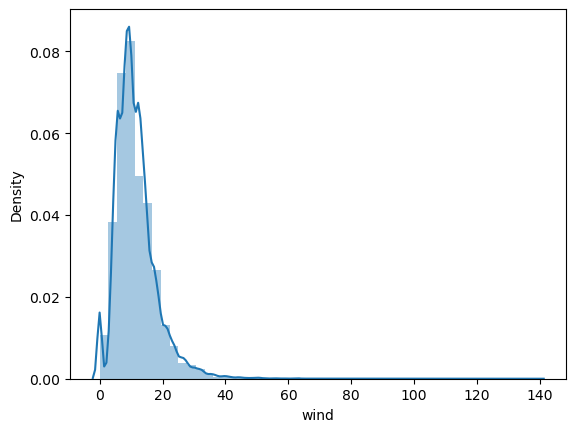

Column: slope
15.015069659150326


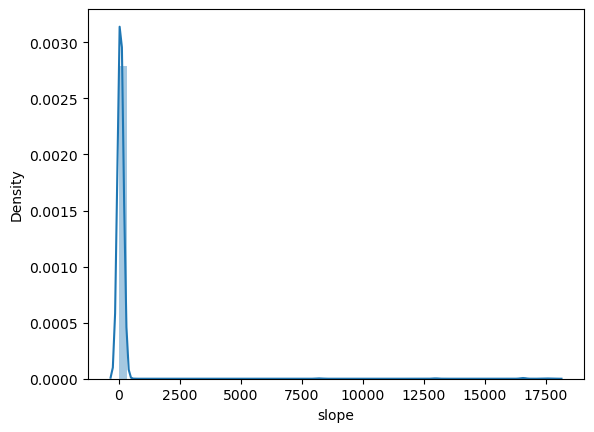

Column: country
0.8628750623405012


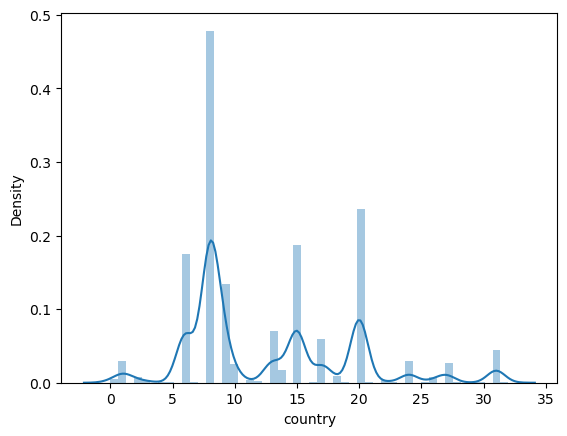

Column: type
1.1233729751884336


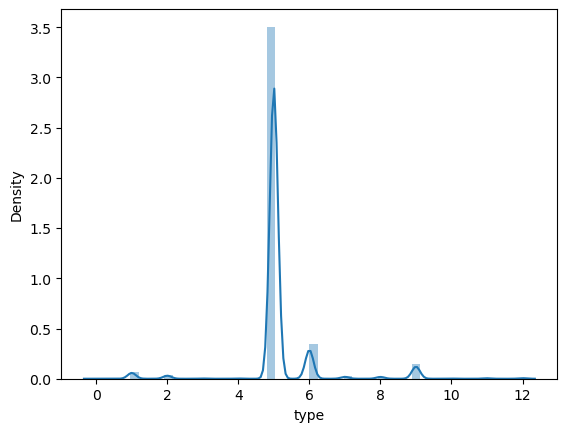

Column: trigger
0.7370844922336434


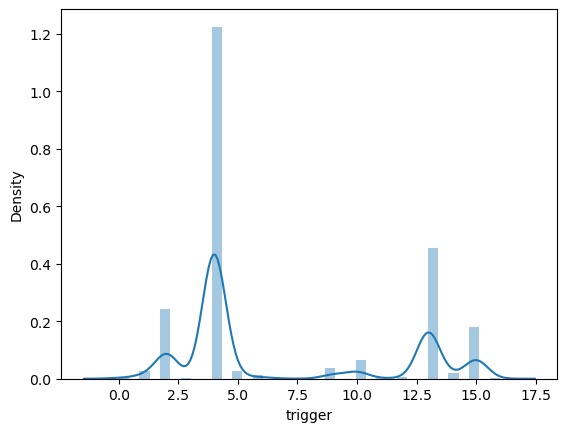

Column: location
2.299679755547877


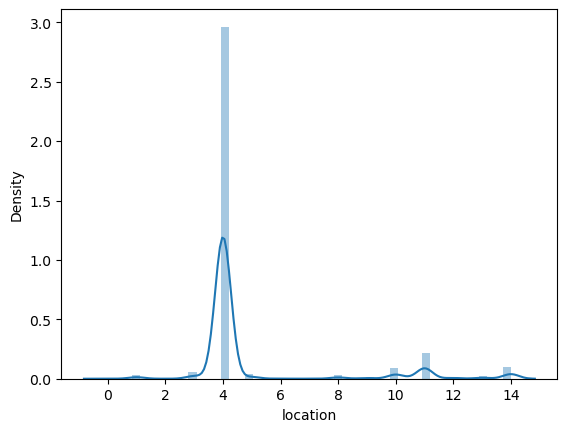

Column: severity
0.06364959933762485


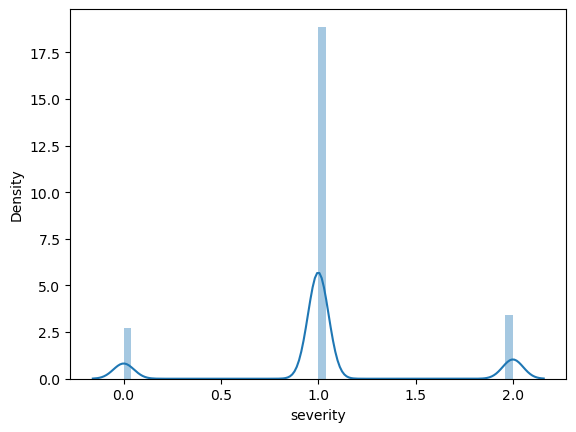

In [123]:
for col in df1.columns:
    print("Column:", col)
    print(skew(df1[col]))
    plt.figure()
    sns.distplot(df1[col])
    plt.show()

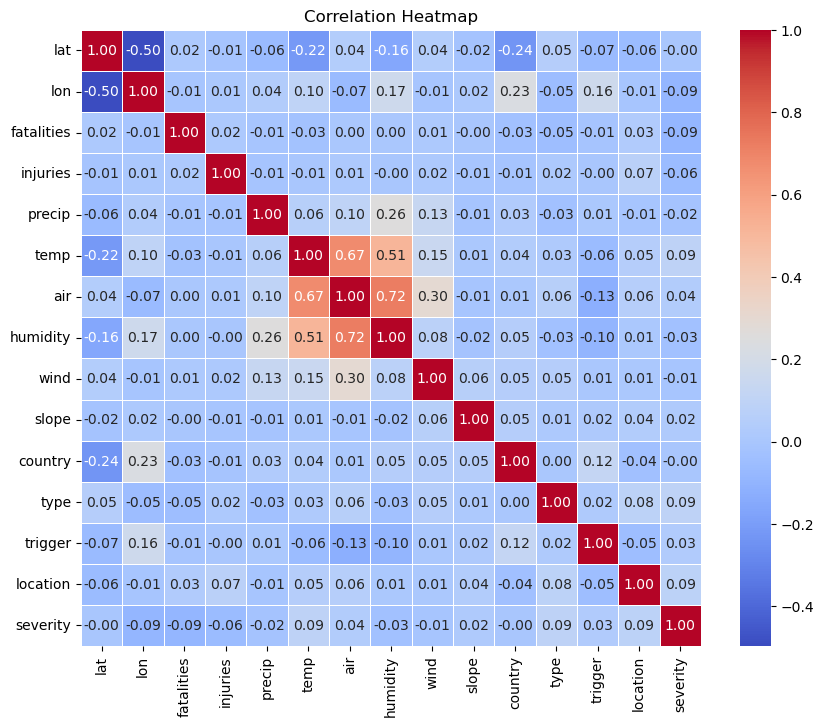

In [124]:
plt.figure(figsize=(10, 8))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [125]:
df1["fatalities"] = np.sqrt(df1["fatalities"])
skew(df1["fatalities"])

14.556988317279515

In [126]:
df1["injuries"] = np.sqrt(df1["injuries"])
skew(df1["injuries"])

8.028458304649543

In [127]:
df1["precip"] = np.sqrt(df1["precip"])
skew(df1["injuries"])

8.028458304649543

In [128]:
df1["wind"] = np.sqrt(df1["wind"])
skew(df1["wind"])

-0.19919361010377076

In [129]:
df1["country"] = np.sqrt(df1["country"])
skew(df1["country"])

0.10215093399416136

In [130]:
df1["trigger"] = np.sqrt(df1["trigger"])
skew(df1["trigger"])

0.49157185536535575

Column: lat
-0.7213706287814249


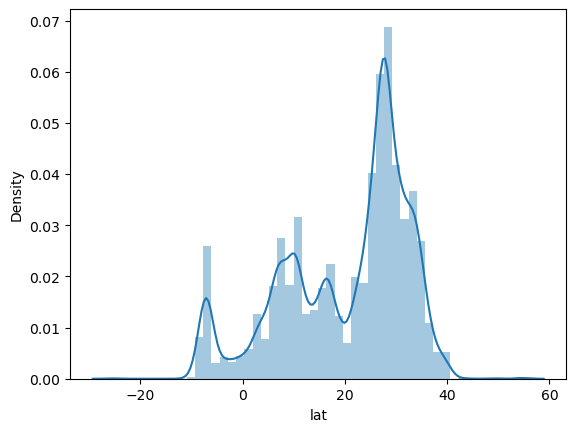

Column: lon
-0.2341250025118206


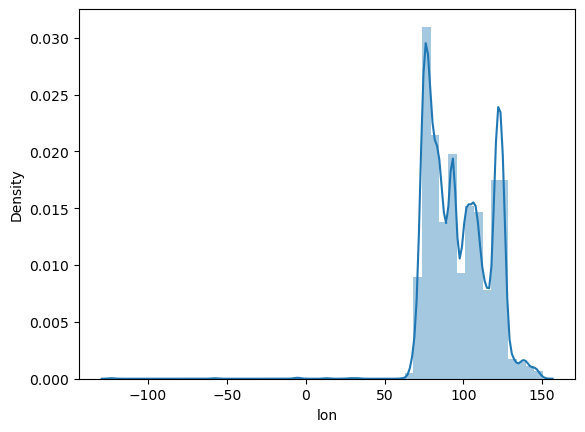

Column: fatalities
14.556988317279515


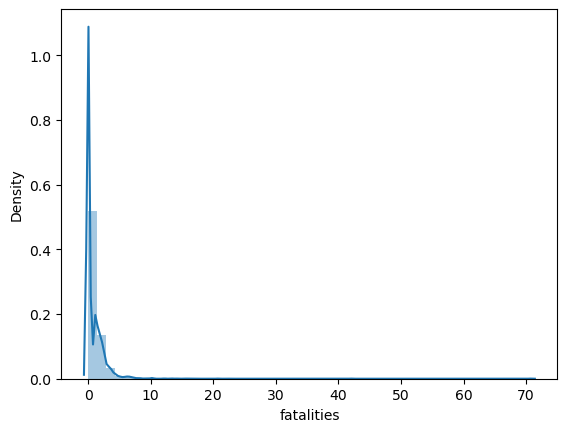

Column: injuries
8.028458304649543


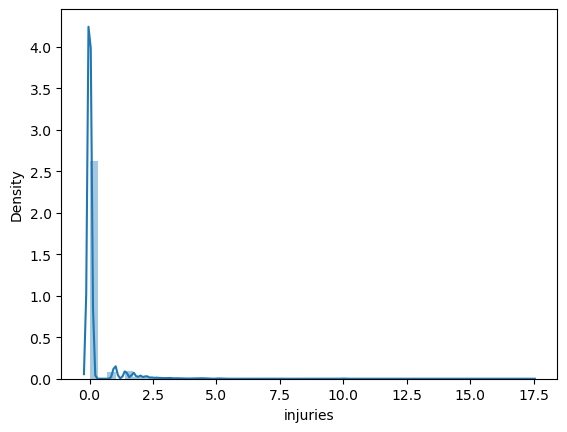

Column: precip
1.1027114750345204


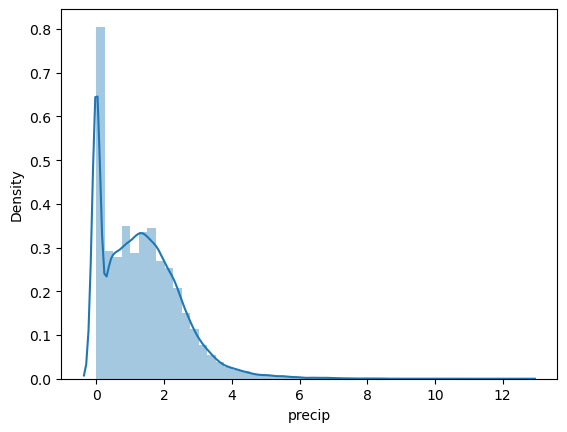

Column: temp
-2.03595939429904


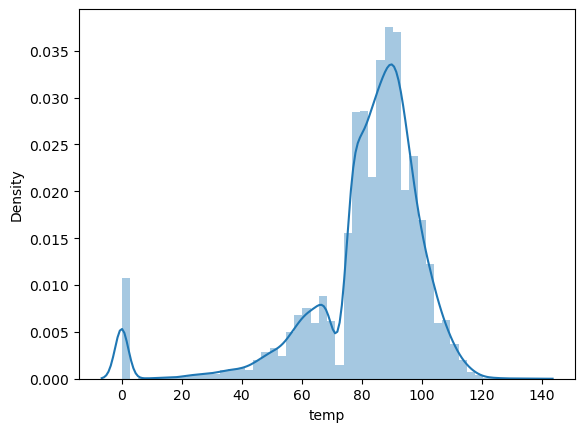

Column: air
-5.584850248469864


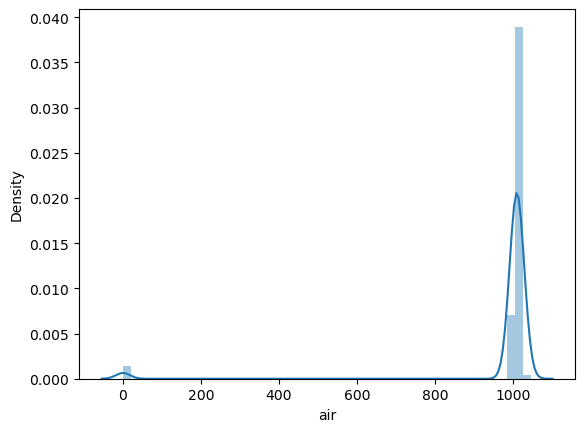

Column: humidity
-2.719368175389688


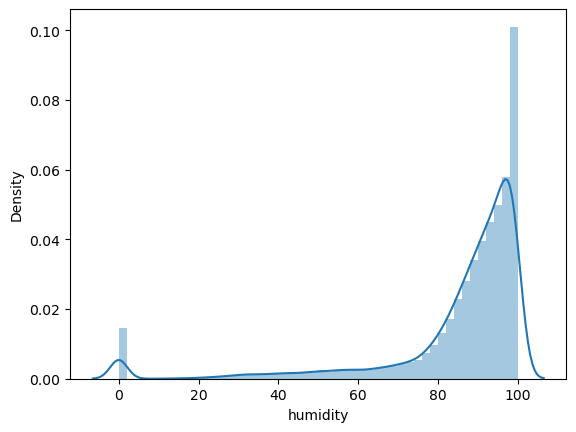

Column: wind
-0.19919361010377076


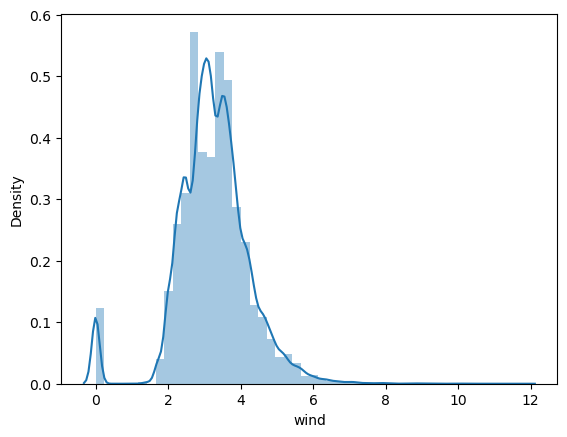

Column: slope
15.015069659150326


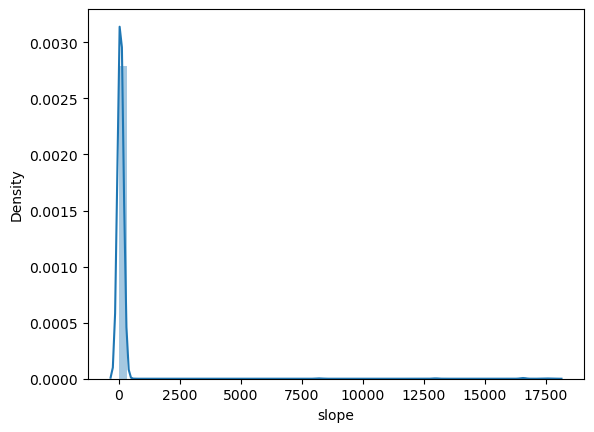

Column: country
0.10215093399416136


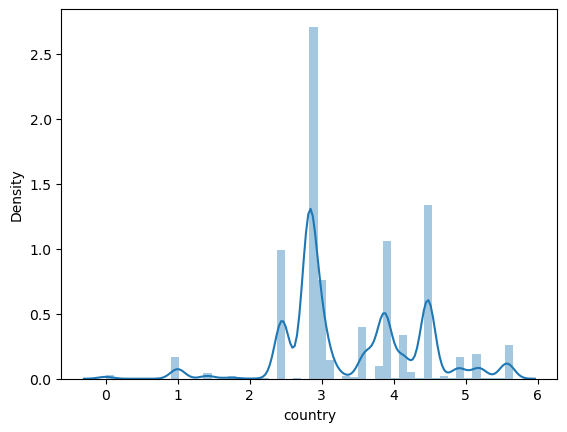

Column: type
1.1233729751884336


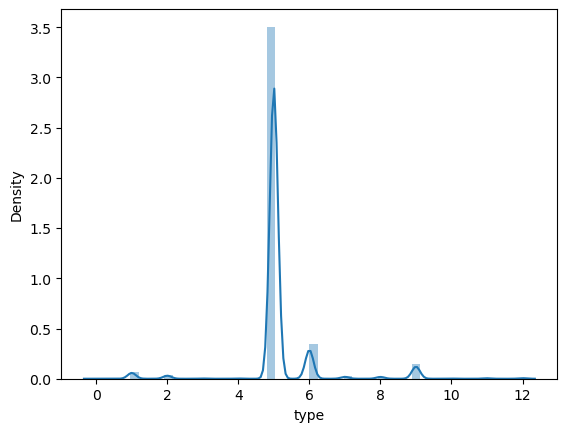

Column: trigger
0.49157185536535575


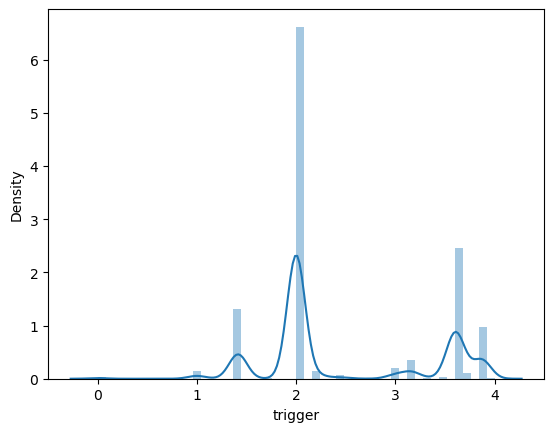

Column: location
2.299679755547877


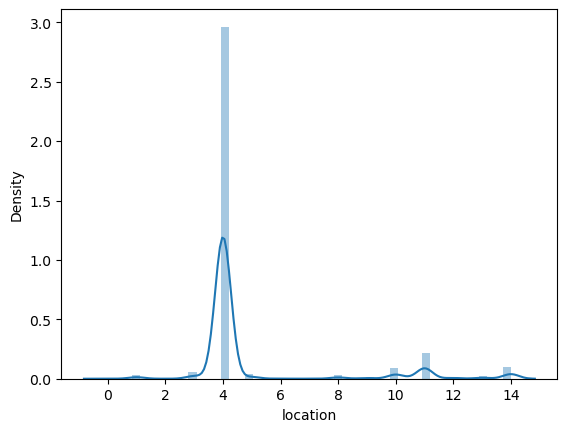

Column: severity
0.06364959933762485


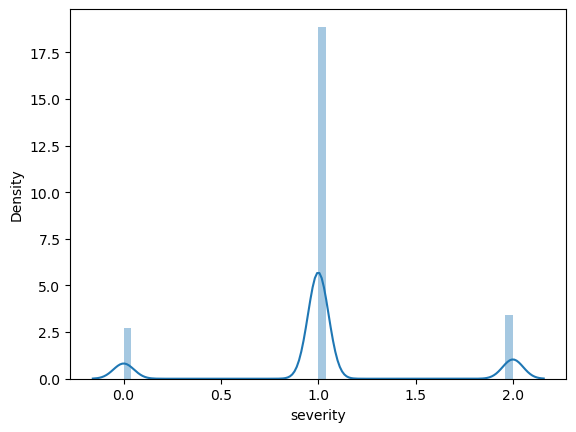

In [131]:
for col in df1.columns:
    print("Column:", col)
    print(skew(df1[col]))
    plt.figure()
    sns.distplot(df1[col])
    plt.show()

In [132]:
# separating numerical and categorical columns
numerical_col = df1[num_cols.columns]
categorical_col = df1[cat_cols.columns]

## Scaling numerical columns

In [133]:
from sklearn.preprocessing import StandardScaler

In [134]:
sc = StandardScaler()

In [135]:
num_cols_scaled = sc.fit_transform(num_cols)

In [136]:
for i in range(len(num_cols.columns)):
    num_cols[num_cols.columns[i]] = num_cols_scaled[:,i]

## Concatinating Scaled numerical cols and label encoded categorical cols

In [137]:
df1 = pd.concat([numerical_col,categorical_col], axis=1)
x = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

In [138]:
y.value_counts()

severity
1    54080
2     9808
0     7744
Name: count, dtype: int64

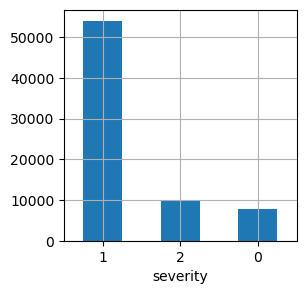

In [139]:
plt.figure(figsize=(3,3))
y.value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.grid()
plt.show()

## Data is imbalanced , need to do sampling using Oversampling or Undersampling

In [140]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(x, y)
x=x_ros
y=y_ros

In [141]:
y_ros.value_counts()

severity
1    54080
2    54080
0    54080
Name: count, dtype: int64

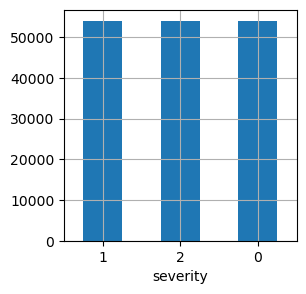

In [142]:
plt.figure(figsize=(3,3))
y_ros.value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.grid()
plt.show()

## The Data is cleaned and can be used for training

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score

In [144]:
# Spliting dataset into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [145]:
dt = DecisionTreeClassifier()

In [146]:
def mymodel(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(classification_report(y_test,y_pred))
    return model

In [147]:
mymodel(dt)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16211
           1       1.00      0.99      1.00     16209
           2       0.99      1.00      1.00     16252

    accuracy                           1.00     48672
   macro avg       1.00      1.00      1.00     48672
weighted avg       1.00      1.00      1.00     48672



DecisionTreeClassifier()

# Hyperparameter Tuning using GridSearchCV

In [148]:
from sklearn.model_selection import GridSearchCV

In [149]:
parameters={'max_depth':['none',10,20,30],'min_samples_split':[2,5,10],'min_samples_leaf':[1,2,4]}
gsDt=GridSearchCV(dt,parameters,verbose=3)

In [150]:
gsDt.fit(x_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END max_depth=none, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 2/5] END max_depth=none, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 3/5] END max_depth=none, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 4/5] END max_depth=none, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 5/5] END max_depth=none, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 1/5] END max_depth=none, min_samples_leaf=1, min_samples_split=5;, score=nan total time=   0.0s
[CV 2/5] END max_depth=none, min_samples_leaf=1, min_samples_split=5;, score=nan total time=   0.0s
[CV 3/5] END max_depth=none, min_samples_leaf=1, min_samples_split=5;, score=nan total time=   0.0s
[CV 4/5] END max_depth=none, min_samples_leaf=1, min_samples_split=5;, score=nan total time=   0.0s
[CV 5/5] END max_depth=none, min_sampl

[CV 3/5] END max_depth=10, min_samples_leaf=4, min_samples_split=5;, score=0.712 total time=   0.3s
[CV 4/5] END max_depth=10, min_samples_leaf=4, min_samples_split=5;, score=0.717 total time=   0.3s
[CV 5/5] END max_depth=10, min_samples_leaf=4, min_samples_split=5;, score=0.716 total time=   0.3s
[CV 1/5] END max_depth=10, min_samples_leaf=4, min_samples_split=10;, score=0.719 total time=   0.3s
[CV 2/5] END max_depth=10, min_samples_leaf=4, min_samples_split=10;, score=0.725 total time=   0.4s
[CV 3/5] END max_depth=10, min_samples_leaf=4, min_samples_split=10;, score=0.712 total time=   0.4s
[CV 4/5] END max_depth=10, min_samples_leaf=4, min_samples_split=10;, score=0.717 total time=   0.4s
[CV 5/5] END max_depth=10, min_samples_leaf=4, min_samples_split=10;, score=0.716 total time=   0.3s
[CV 1/5] END max_depth=20, min_samples_leaf=1, min_samples_split=2;, score=0.949 total time=   0.5s
[CV 2/5] END max_depth=20, min_samples_leaf=1, min_samples_split=2;, score=0.944 total time=   

[CV 5/5] END max_depth=30, min_samples_leaf=2, min_samples_split=10;, score=0.991 total time=   0.5s
[CV 1/5] END max_depth=30, min_samples_leaf=4, min_samples_split=2;, score=0.992 total time=   0.5s
[CV 2/5] END max_depth=30, min_samples_leaf=4, min_samples_split=2;, score=0.984 total time=   0.5s
[CV 3/5] END max_depth=30, min_samples_leaf=4, min_samples_split=2;, score=0.990 total time=   0.5s
[CV 4/5] END max_depth=30, min_samples_leaf=4, min_samples_split=2;, score=0.988 total time=   0.6s
[CV 5/5] END max_depth=30, min_samples_leaf=4, min_samples_split=2;, score=0.989 total time=   0.6s
[CV 1/5] END max_depth=30, min_samples_leaf=4, min_samples_split=5;, score=0.992 total time=   0.6s
[CV 2/5] END max_depth=30, min_samples_leaf=4, min_samples_split=5;, score=0.984 total time=   0.5s
[CV 3/5] END max_depth=30, min_samples_leaf=4, min_samples_split=5;, score=0.990 total time=   0.5s
[CV 4/5] END max_depth=30, min_samples_leaf=4, min_samples_split=5;, score=0.988 total time=   0.5s

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': ['none', 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=3)

In [151]:
gsDt.best_params_

{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [152]:
dt_hypertuned=DecisionTreeClassifier(max_depth=30,min_samples_leaf=1,min_samples_split=2)    
mymodel(dt_hypertuned)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16211
           1       1.00      0.99      0.99     16209
           2       0.99      1.00      1.00     16252

    accuracy                           1.00     48672
   macro avg       1.00      1.00      1.00     48672
weighted avg       1.00      1.00      1.00     48672



DecisionTreeClassifier(max_depth=30)

In [153]:
print("Decision Tree:",dt.score(x_train,y_train))
print("Hypertuned Decision Tree:", dt_hypertuned.score(x_train,y_train))

Decision Tree: 0.999947168216399
Hypertuned Decision Tree: 0.9987760636799098


In [134]:
y_pred= dt.predict(x_test)
accuracy_score(y_pred,y_test)

0.9970208744247205

In [135]:
y_pred= dt_hypertuned.predict(x_test)
accuracy_score(y_pred,y_test)

0.9959730440499671

In [4]:
import pickle

In [137]:
filename= "trainedModel_DecisionTree.sav"
pickle.dump(dt, open(filename, 'wb'))

In [141]:
with open('labelEncoder_dictionary_DecisionTree.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

In [5]:
loaded_model = pickle.load(open("trainedModel_DecisionTree.sav", 'rb'))
loaded_label_encoder = pickle.load(open("labelEncoder_dictionary_DecisionTree.pkl", 'rb'))

In [8]:
loaded_label_encoder

{'country': LabelEncoder(),
 'type': LabelEncoder(),
 'trigger': LabelEncoder(),
 'location': LabelEncoder(),
 'severity': LabelEncoder()}

In [83]:

input_data = [-6.6811, 107.0274, "Indonesia", 0.0, 11.0, "landslide", "continuous_rain", "natural_slope", 4.3, 93, 1014, 92, 11, -1]

In [84]:
#label encoding input data
for i in range(len(input_data)):
    if(i==2):
        label_enc = loaded_label_encoder["country"]
        input_data[i] = label_enc.transform([input_data[i]])[0]
    elif(i==5):
        label_enc = loaded_label_encoder["type"]
        input_data[i] = label_enc.transform([input_data[i]])[0]
    elif(i==6):
        label_enc = loaded_label_encoder["trigger"]
        input_data[i] = label_enc.transform([input_data[i]])[0]
    elif(i==7):
        label_enc = loaded_label_encoder["location"]
        input_data[i] = label_enc.transform([input_data[i]])[0]
input_data

[-6.6811, 107.0274, 9, 0.0, 11.0, 5, 2, 11, 4.3, 93, 1014, 92, 11, -1]

In [86]:
input_data_as_numpy_array = np.array(input_data)

# reshape the array into 1 row and all columns-type,  as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print("Opportunity Result:",loaded_label_encoder["severity"].inverse_transform([prediction])[0])

Opportunity Result: small
